# load data

In [1]:
import pandas as pd
df=pd.read_csv("EpilepticSeizure.csv")
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [2]:
df.shape

(11500, 180)

In [3]:
df.y.value_counts()

1    2300
2    2300
3    2300
4    2300
5    2300
Name: y, dtype: int64

# since here two types of person either have epileptic seizure or not so we convert the given data into binary classification

In [4]:
dict={1:1,2:0,3:0,4:0,5:0}
df.y=df.y.map(dict)
df.y

0        0
1        1
2        0
3        0
4        0
        ..
11495    0
11496    1
11497    0
11498    0
11499    0
Name: y, Length: 11500, dtype: int64

In [5]:
df.y.value_counts()

0    9200
1    2300
Name: y, dtype: int64

# Here data are imbalanced so we balance it using smote

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
df=df.drop('Unnamed',axis='columns')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,0


In [8]:
x=df.drop('y',axis='columns')
x

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [9]:
y=df.y
y

0        0
1        1
2        0
3        0
4        0
        ..
11495    0
11496    1
11497    0
11498    0
11499    0
Name: y, Length: 11500, dtype: int64

In [10]:
smote=SMOTE(sampling_strategy='minority')
sx,sy=smote.fit_resample(x,y)
sy.value_counts()

0    9200
1    9200
Name: y, dtype: int64

In [11]:
sx

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,-320,-402,-336,-193,-97,-52,-44,-27,13,41,...,-216,-230,-248,-263,-278,-292,-305,-312,-316,-324
18396,-41,-59,-51,-19,20,65,101,125,138,149,...,-22,18,45,69,97,123,146,166,188,203
18397,-79,-110,-145,-166,-194,-217,-242,-253,-235,-207,...,30,26,36,54,79,90,102,100,57,-5
18398,-205,-216,-244,-285,-323,-338,-334,-299,-130,35,...,-328,-164,52,286,400,371,331,305,271,211


In [12]:
sy

0        0
1        1
2        0
3        0
4        0
        ..
18395    1
18396    1
18397    1
18398    1
18399    1
Name: y, Length: 18400, dtype: int64

In [13]:
sx.isnull().sum().sum()

0

In [14]:
data=pd.concat([sx,sy],axis='columns')
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,-320,-402,-336,-193,-97,-52,-44,-27,13,41,...,-230,-248,-263,-278,-292,-305,-312,-316,-324,1
18396,-41,-59,-51,-19,20,65,101,125,138,149,...,18,45,69,97,123,146,166,188,203,1
18397,-79,-110,-145,-166,-194,-217,-242,-253,-235,-207,...,26,36,54,79,90,102,100,57,-5,1
18398,-205,-216,-244,-285,-323,-338,-334,-299,-130,35,...,-164,52,286,400,371,331,305,271,211,1


# Feature Scaling

In [15]:
x_data=data.drop('y',axis='columns')
x_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,-320,-402,-336,-193,-97,-52,-44,-27,13,41,...,-216,-230,-248,-263,-278,-292,-305,-312,-316,-324
18396,-41,-59,-51,-19,20,65,101,125,138,149,...,-22,18,45,69,97,123,146,166,188,203
18397,-79,-110,-145,-166,-194,-217,-242,-253,-235,-207,...,30,26,36,54,79,90,102,100,57,-5
18398,-205,-216,-244,-285,-323,-338,-334,-299,-130,35,...,-328,-164,52,286,400,371,331,305,271,211


In [16]:
y_data=data.y
y_data

0        0
1        1
2        0
3        0
4        0
        ..
18395    1
18396    1
18397    1
18398    1
18399    1
Name: y, Length: 18400, dtype: int64

In [17]:
import keras
y_data=y_data.astype(float)
y_data.dtype
from keras.utils import to_categorical
y_data=to_categorical(y_data)
y_data

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [18]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scale=StandardScaler()
x_data=scale.fit_transform(x_data)


In [19]:
x_data

array([[ 0.72300801,  0.97376278,  1.1675359 , ..., -0.485363  ,
        -0.32714603, -0.17132434],
       [ 1.94310927,  1.89772154,  1.78468366, ...,  0.8627379 ,
         0.80498997,  0.72068414],
       [-0.08877251, -0.12825054, -0.17366709, ..., -0.08093273,
        -0.08669237, -0.0969903 ],
       ...,
       [-0.31723769, -0.46992279, -0.64989134, ...,  0.59311772,
         0.37417715,  0.05663338],
       [-0.9297188 , -0.98002502, -1.13097502, ...,  1.61667581,
         1.44619973,  1.12704355],
       [-0.23946231, -0.15231197, -0.0813379 , ...,  0.51323026,
         0.48438508,  0.49272641]])

In [20]:
x_data.shape

(18400, 178)

In [21]:
y_data.shape

(18400, 2)

# Split Data for training and testing

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3)

In [23]:
x_train.shape , y_train.shape

((12880, 178), (12880, 2))

In [24]:
x_test.shape , y_test.shape

((5520, 178), (5520, 2))

# Change Dimension

In [25]:
import numpy as np
x_train=x_train.reshape(12880,178,1)
x_test=x_test.reshape(5520,178,1)
x_train.shape , x_test.shape

((12880, 178, 1), (5520, 178, 1))

In [26]:
x_train.shape , y_train.shape

((12880, 178, 1), (12880, 2))

In [27]:
x_test.shape , y_train.shape

((5520, 178, 1), (12880, 2))

# CNN Model

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
cnn=keras.Sequential([
    #LAYER 1
    keras.layers.Conv1D(filters=80 , kernel_size=4, activation='relu', input_shape=(178,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(3),
    
    #LAYER 2
    keras.layers.Conv1D(filters=80 , kernel_size=4, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(3),
    
    #LAYER 3
    keras.layers.Conv1D(filters=120 , kernel_size=4, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])


In [30]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 175, 80)           400       
_________________________________________________________________
batch_normalization (BatchNo (None, 175, 80)           320       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 58, 80)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 55, 80)            25680     
_________________________________________________________________
batch_normalization_1 (Batch (None, 55, 80)            320       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 18, 80)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 120)           3

In [31]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist=cnn.fit(x_train, y_train , epochs=30,validation_split=0.2)

Epoch 1/30
322/322 [==============================] - 7s 23ms/step - loss: 0.1433 - accuracy: 0.9469 - val_loss: 0.3244 - val_accuracy: 0.8331
Epoch 2/30
322/322 [==============================] - 8s 26ms/step - loss: 0.0762 - accuracy: 0.9705 - val_loss: 0.1808 - val_accuracy: 0.9464
Epoch 3/30
322/322 [==============================] - 7s 23ms/step - loss: 0.0674 - accuracy: 0.9749 - val_loss: 0.0469 - val_accuracy: 0.9837
Epoch 4/30
322/322 [==============================] - 8s 24ms/step - loss: 0.0453 - accuracy: 0.9830 - val_loss: 0.0303 - val_accuracy: 0.9876
Epoch 5/30
322/322 [==============================] - 8s 25ms/step - loss: 0.0252 - accuracy: 0.9910 - val_loss: 0.0713 - val_accuracy: 0.9744
Epoch 6/30
322/322 [==============================] - 8s 25ms/step - loss: 0.0378 - accuracy: 0.9854 - val_loss: 0.0995 - val_accuracy: 0.9736
Epoch 7/30
322/322 [==============================] - 8s 24ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0270 - val_accuracy: 0.9887

In [35]:
loss=hist.history['loss']
accuracy=hist.history['accuracy']
val_loss=hist.history['val_loss']
val_accuracy=hist.history['val_accuracy']
epoch=np.arange(1,31)

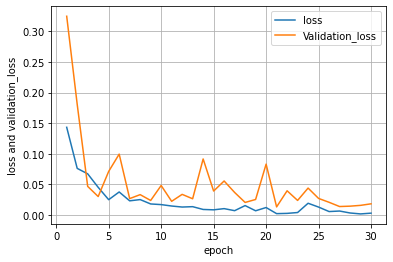

In [36]:
import matplotlib.pyplot as plt
plt.plot(epoch,loss,label="loss")
plt.plot(epoch,val_loss,label='Validation_loss')
plt.xlabel("epoch")
plt.ylabel("loss and validation_loss")
plt.grid(axis="both")
plt.legend()
plt.show()


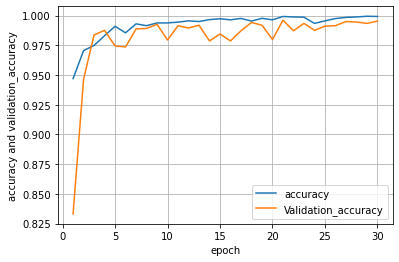

In [37]:
import matplotlib.pyplot as plt
plt.plot(epoch,accuracy,label="accuracy")
plt.plot(epoch,val_accuracy,label='Validation_accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy and validation_accuracy")
plt.grid(axis="both")
plt.legend()
plt.show()

In [38]:
cnn.evaluate(x_test,y_test)

173/173 [==============================] - 1s 4ms/step - loss: 0.0260 - accuracy: 0.9931: 0s - loss: 0.0262 - accuracy: 0.99


[0.026007406413555145, 0.9931159615516663]

In [39]:
y_pred=cnn.predict(x_test)
y_pred

array([[4.1851561e-10, 1.0000000e+00],
       [1.0000000e+00, 6.5166705e-10],
       [1.1921769e-08, 1.0000000e+00],
       ...,
       [3.9811070e-14, 1.0000000e+00],
       [1.3696096e-11, 1.0000000e+00],
       [9.9999976e-01, 2.5043371e-07]], dtype=float32)

In [40]:
y_test=[np.argmax(i) for i in y_test]
y_pred=[np.argmax(i) for i in y_pred]
y_pred

[1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [41]:
y_test

[1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [42]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

In [43]:
print(cm)

tf.Tensor(
[[2686   25]
 [  13 2796]], shape=(2, 2), dtype=int32)


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

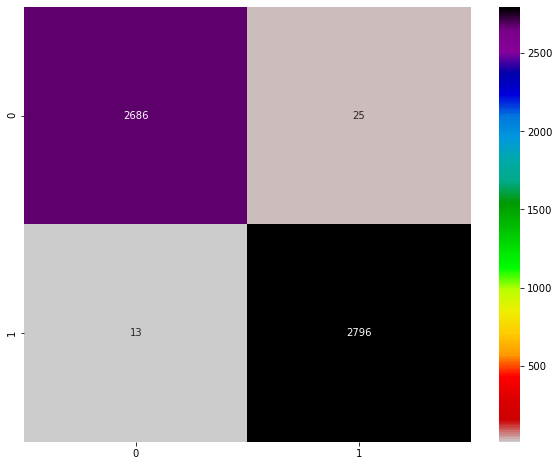

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt="d",cmap='nipy_spectral_r')
plt.show()

In [46]:
from sklearn.metrics import classification_report


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2711
           1       0.99      1.00      0.99      2809

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520

